In [1]:
!pip install ipywidgets widgetsnbextension pandas-profiling
!jupyter nbextension enable --py widgetsnbextension

import ipywidgets

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [71]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [72]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [73]:
input_size = 784
hidden_size = 100  # num of neurons in hidden layer
num_classes = 10   #labels
num_epochs = 10
batch_size = 32
learning_rate = 0.001

In [74]:
#CIFAR10
train_dataset = datasets.CIFAR10(root='./cifar_dataset', train=True, transform=transforms.ToTensor(), download=True)
test_dataset  = datasets.CIFAR10(root='./cifar_dataset', train=False, transform=transforms.ToTensor())


train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [75]:
examples = iter(train_loader)

images, labels = examples.next()

print(samples.shape, labels.shape)

torch.Size([4, 3, 32, 32]) torch.Size([32])


In [76]:
def imshow(img):
    npimg = img.numpy()
    print(npimg.shape)
    print(np.transpose(npimg, (1,2,0)).shape)
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

(3, 138, 274)
(138, 274, 3)


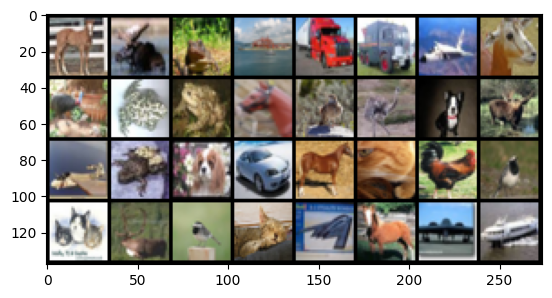

In [77]:
imshow(torchvision.utils.make_grid(images))

In [78]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(16*5*5, 120)  # 16*5*5 flattened fully connected layer
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)   # tensor flattened
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        

In [79]:
#model
model = ConvNet().to(device) # to(device) to keep the tensors in the activated device (cuda in this case)
#loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [80]:
# training loop
n_total_steps = len(train_loader)
print(n_total_steps)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # original shape [4, 3, 32, 32] = [4,3,1024]
        # input layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)
        
        # forward 
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backwards
        optimizer.zero_grad() # to empty the gradient attribute from the last forward prop
        loss.backward()       # backward prop
        optimizer.step()      # update parameters in each step
        
        if (i+1)%2000 == 0:
            print('epoch ', (epoch+1), '/', num_epochs, 'step ', ((i+1)/n_total_steps), 'loss = ', '%.4f' % loss.item())
        
        

1563


In [81]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # values, index
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.shape[0]           # number of samples in the batch
        n_correct += (predicted == labels).sum().item() # sum of all prediction index 
                                                        # matching with label indices, .item() extracts the data part of the tensor
            
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1
    
    acc = 100.0 * n_correct/n_samples
    
    print('accuracy of the network = ', acc)
    
    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print('Accuracy of ', classes[i], ':', acc)

IndexError: index 16 is out of bounds for dimension 0 with size 16